In [3]:
import matplotlib.pyplot as plt
import torch

In [4]:
# What values for theta1 and theta2 will return the smallest possible value?

def stretched_bowl_loss_function(theta1, theta2):
    return (0.1 * theta1 ** 2) + (2 * theta2 ** 2)

$$
\begin{align}
f(x) &= 0.1 \theta_1^2 + 2 \theta_2^2\\
\frac{\partial f}{\partial \theta_1} &= 0.2 \theta_1\\
\frac{\partial f}{\partial \theta_2} &= 4 \theta_2
\end{align}
$$

In [5]:
theta1_list = torch.linspace(-4, 4, 100)
theta2_list = torch.linspace(-4, 4, 100)

theta1_grid, theta2_grid = torch.meshgrid(theta1_list, theta2_list)
theta1_grid, theta2_grid

(tensor([[-4.0000, -4.0000, -4.0000,  ..., -4.0000, -4.0000, -4.0000],
         [-3.9192, -3.9192, -3.9192,  ..., -3.9192, -3.9192, -3.9192],
         [-3.8384, -3.8384, -3.8384,  ..., -3.8384, -3.8384, -3.8384],
         ...,
         [ 3.8384,  3.8384,  3.8384,  ...,  3.8384,  3.8384,  3.8384],
         [ 3.9192,  3.9192,  3.9192,  ...,  3.9192,  3.9192,  3.9192],
         [ 4.0000,  4.0000,  4.0000,  ...,  4.0000,  4.0000,  4.0000]]),
 tensor([[-4.0000, -3.9192, -3.8384,  ...,  3.8384,  3.9192,  4.0000],
         [-4.0000, -3.9192, -3.8384,  ...,  3.8384,  3.9192,  4.0000],
         [-4.0000, -3.9192, -3.8384,  ...,  3.8384,  3.9192,  4.0000],
         ...,
         [-4.0000, -3.9192, -3.8384,  ...,  3.8384,  3.9192,  4.0000],
         [-4.0000, -3.9192, -3.8384,  ...,  3.8384,  3.9192,  4.0000],
         [-4.0000, -3.9192, -3.8384,  ...,  3.8384,  3.9192,  4.0000]]))

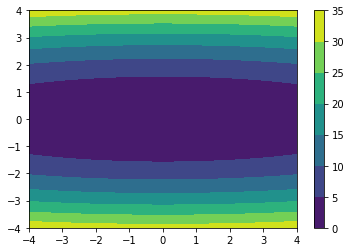

In [6]:
stretched_bowl_values = stretched_bowl_loss_function(theta1_grid, theta2_grid)


cplot = plt.contourf(theta1_grid, theta2_grid, stretched_bowl_values);
plt.colorbar(cplot);

# Gradient Descent

$$
\theta_{t+1} = \theta_t - \eta g
$$

In [27]:
# Gradient descent

# Hyperparameters
learning_rate = 0.4
num_epochs = 20

theta = torch.tensor([3.0, 3.0], requires_grad=True)

thistory = [theta.detach().clone()]
lhistory = []

for epoch in range(num_epochs):
    
    # We don't have any model
    
    # Compute loss
    loss = stretched_bowl_loss_function(theta[0], theta[1])
    
    # Compute gradients
    theta.grad = None
    loss.backward()
    
    print(loss.item(), theta.detach())
    
    # Update parameters
    with torch.no_grad():
        theta -= learning_rate * theta.grad
    
    thistory.append(theta.detach().clone())
    lhistory.append(loss.item())

18.899999618530273 tensor([3., 3.])
7.241761207580566 tensor([ 2.7600, -1.8000])
2.9775543212890625 tensor([2.5392, 1.0800])
1.3855278491973877 tensor([ 2.3361, -0.6480])
0.764228105545044 tensor([2.1492, 0.3888])
0.49978888034820557 tensor([ 1.9772, -0.2333])
0.37008193135261536 tensor([1.8191, 0.1400])
0.29417914152145386 tensor([ 1.6735, -0.0840])
0.2421322613954544 tensor([1.5397, 0.0504])
0.2024708092212677 tensor([ 1.4165, -0.0302])
0.17048212885856628 tensor([1.3032, 0.0181])
0.14397594332695007 tensor([ 1.1989, -0.0109])
0.1217460185289383 tensor([1.1030, 0.0065])
0.1030043438076973 tensor([ 1.0148, -0.0039])
0.08716794848442078 tensor([0.9336, 0.0024])
0.0737735703587532 tensor([ 0.8589, -0.0014])
0.06244001165032387 tensor([0.7902, 0.0008])
0.05284852534532547 tensor([ 7.2697e-01, -5.0780e-04])
0.044730741530656815 tensor([6.6881e-01, 3.0468e-04])
0.03786000981926918 tensor([ 6.1530e-01, -1.8281e-04])


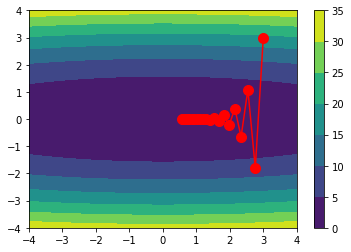

In [28]:
cplot = plt.contourf(theta1_grid, theta2_grid, stretched_bowl_values);
plt.colorbar(cplot);

x1 = [p[0].item() for p in thistory]
x2 = [p[1].item() for p in thistory]

plt.plot(x1, x2, color='red', marker='o', markersize=10);

# Gradient Descent with Momentum

$$
\begin{align}
v_{t+1} &= \beta v_t + (1 - \beta) g\\
\theta_{t+1} &= \theta_t - \eta v_{t+1}
\end{align}
$$

In [32]:
# Hyperparameters
learning_rate = 1.5
num_epochs = 20
beta = 0.9 # In the range 0.5 to 0.999

theta = torch.tensor([3.0, 3.0], requires_grad=True)
momentum = torch.zeros_like(theta)

thistory_mo = [theta.detach().clone()]
lhistory_mo = []

for epoch in range(num_epochs):
    
    # We don't have any model
    
    # Compute loss
    loss = stretched_bowl_loss_function(theta[0], theta[1])
    
    # Compute gradients
    theta.grad = None
    loss.backward()
    
    print(loss.item(), theta.detach())
    
    # Update parameters
    with torch.no_grad():
        momentum = beta * momentum + (1 - beta) * theta.grad
        theta -= learning_rate * momentum
    
    thistory_mo.append(theta.detach().clone())
    lhistory_mo.append(loss.item())

18.899999618530273 tensor([3., 3.])
3.7268097400665283 tensor([2.9100, 1.2000])
3.350893020629883 tensor([ 2.7417, -1.1400])
13.75668716430664 tensor([ 2.5080, -2.5620])
11.116264343261719 tensor([ 2.2224, -2.3046])
1.3131979703903198 tensor([ 1.8987, -0.6902])
3.0105910301208496 tensor([1.5504, 1.1769])
9.396517753601074 tensor([1.1904, 2.1511])
6.105199337005615 tensor([0.8307, 1.7373])
0.23115049302577972 tensor([0.4821, 0.3224])
2.6216397285461426 tensor([ 0.1538, -1.1444])
6.32391881942749 tensor([-0.1462, -1.7779])
3.3004307746887207 tensor([-0.4118, -1.2813])
0.04937948286533356 tensor([-0.6386, -0.0656])
2.348635673522949 tensor([-0.8234,  1.0679])
4.282538890838623 tensor([-0.9651,  1.4473])
1.8073707818984985 tensor([-1.0637,  0.9204])
0.14806340634822845 tensor([-1.1205, -0.1061])
1.9967660903930664 tensor([-1.1380, -0.9662])
2.8195788860321045 tensor([-1.1197, -1.1606])


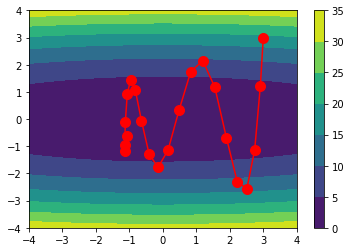

In [33]:
cplot = plt.contourf(theta1_grid, theta2_grid, stretched_bowl_values);
plt.colorbar(cplot);

x1 = [p[0].item() for p in thistory_mo]
x2 = [p[1].item() for p in thistory_mo]

plt.plot(x1, x2, color='red', marker='o', markersize=10);

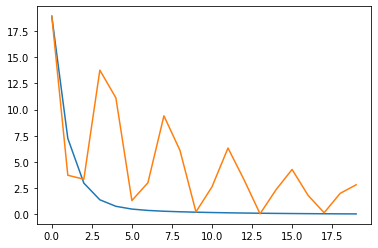

In [34]:
plt.plot(lhistory)
plt.plot(lhistory_mo)

# Exponential Averaging

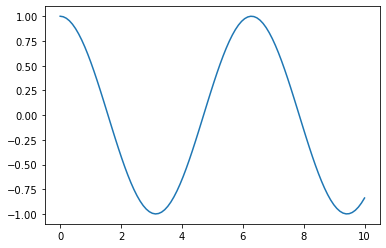

In [35]:
x = torch.linspace(0, 10, 100)
y = torch.cos(x)

plt.plot(x, y);

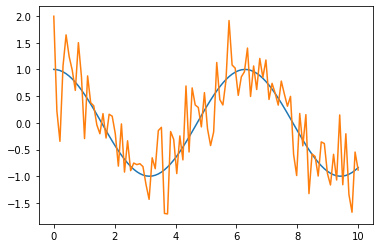

In [36]:
ynoisy = y + torch.randn_like(x) * 0.5

plt.plot(x, y)
plt.plot(x, ynoisy);

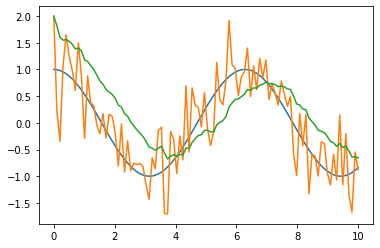

In [41]:
beta = 0.9

ysmoothed = [ynoisy[0]]
for yval in ynoisy[1:]:
    ysmoothed.append(beta * ysmoothed[-1] + (1 - beta) * yval)

plt.plot(x, y)
plt.plot(x, ynoisy)
plt.plot(x, ysmoothed);

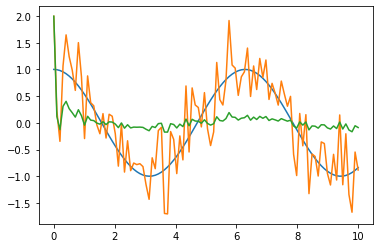

In [45]:
ysmoothed_corrected = [0]
t = 1
y_prev = ysmoothed_corrected[0]

for yval in ynoisy:
    newy = beta * y_prev + (1 - beta) * yval
    yprev = newy
    ysmoothed_corrected.append(newy / (1 - beta ** t))
    t += 1
    
plt.plot(x, y)
plt.plot(x, ynoisy)
plt.plot(x, ysmoothed_corrected[1:])